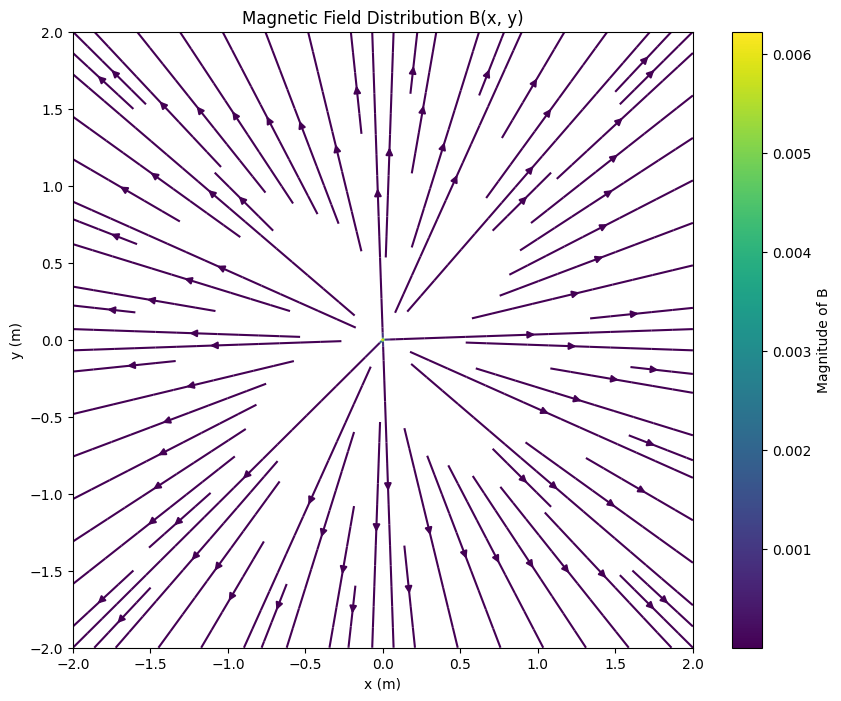

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
mu0 = 4 * np.pi * 1e-7

# Параметры соленоида
D = 1  # Диаметр соленоида, м
L = 10  # Длина соленоида, м
N = 1000  # Число витков
I = 1  # Ток, А

# Параметры сетки
x_min, x_max = -2, 2
y_min, y_max = -2, 2
num_points = 500

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)

# Расчет магнитного поля
Bx = np.zeros_like(X)
By = np.zeros_like(Y)

dz = L / N  # Расстояние между витками
z0 = -L / 2  # Начальная позиция по оси z

for n in range(N):
    z = z0 + n * dz
    r = np.sqrt((X**2) + (Y**2) + (z**2))
    dB = (mu0 * I / (4 * np.pi)) * (dz / (r**3))
    
    Bx += dB * (X / r)
    By += dB * (Y / r)

# Визуализация магнитного поля
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, Bx, By, color=np.sqrt(Bx**2 + By**2), cmap='viridis')
plt.colorbar(label='Magnitude of B')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Magnetic Field Distribution B(x, y)')
plt.show()
